<a href="https://colab.research.google.com/github/Reconocimiento-de-patrones-UNQ/Clase5/blob/main/ReducciondeDimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducción de Dimensiones

En esta clase, abordaremos uno de los desafíos más comunes en Machine Learning: trabajar con conjuntos de datos que tienen una gran cantidad de características o "dimensiones". A veces, un dataset puede tener miles o incluso millones de características por cada instancia de entrenamiento.

### La Maldición de la Dimensionalidad

Este problema se conoce como la **"maldición de la dimensionalidad"**. Cuando la cantidad de características es excesiva, ocurren varios problemas:
* **Rendimiento Lento:** El entrenamiento de los modelos se vuelve extremadamente lento.
* **Dificultad para encontrar soluciones:** Un espacio de alta dimensión es vasto y disperso, lo que hace más difícil para los algoritmos encontrar patrones significativos y generalizables.
* **Visualización Imposible:** Es humanamente imposible visualizar datos en más de 3 dimensiones, lo que limita nuestra capacidad de comprender la estructura de los datos.
* **Ruido y Redundancia:** Muchas de estas características pueden ser redundantes (aportan información similar a otras) o simplemente ruido (información irrelevante), lo que puede confundir a los modelos y llevar a un peor rendimiento.

### ¿Qué es la Reducción de Dimensiones?

La **reducción de dimensiones** es el proceso de transformar los datos de un espacio de alta dimensión a un espacio de menor dimensión, buscando retener la mayor cantidad de información relevante posible. Es como tomar una foto 3D y convertirla en 2D, intentando no perder los detalles cruciales.

**Beneficios de la Reducción de Dimensiones:**
* **Almacenamiento y Computación Más Eficientes:** Menos datos significan menos espacio de almacenamiento y tiempos de procesamiento más rápidos.
* **Eliminación de Ruido:** Ayuda a descartar características menos informativas o "ruidosas", que pueden degradar el rendimiento de los modelos predictivos.
* **Mejora de la Visualización:** Permite proyectar datos de alta dimensión en 2 o 3 dimensiones, facilitando la identificación de patrones y estructuras.
* **Preparación para Otros Algoritmos:** Muchos algoritmos de Machine Learning funcionan mejor con menos características.

Es importante recordar que, al igual que comprimir una imagen JPEG, la reducción de dimensiones implica una **cierta pérdida de información**. Esto puede acelerar el entrenamiento, pero ocasionalmente podría resultar en una ligera disminución en la precisión del modelo final.

### Análisis de Componentes Principales (PCA)

El **Análisis de Componentes Principales (PCA)** es una de las técnicas de reducción de dimensiones más fundamentales y utilizadas. Es un algoritmo de aprendizaje no supervisado que opera identificando las **direcciones (o componentes principales)** en los datos a lo largo de las cuales la variación es máxima.

**¿Cómo funciona PCA?**

PCA se basa en la idea de que la información más importante en un conjunto de datos se encuentra a lo largo de las direcciones donde los datos varían más.

1.  **Decorrelación (Rotación y Centrado):**
    * PCA primero centra los datos, es decir, los desplaza para que su media sea 0.
    * Luego, rota los datos de manera que los ejes de máxima varianza (los "componentes principales") se alineen con los ejes coordenados. Esto elimina la correlación lineal entre las características originales, lo que es beneficioso para muchos algoritmos.

2.  **Reducción de Dimensión:**
    * Una vez que los datos están decorrelacionados y alineados, PCA identifica los componentes principales en orden de la cantidad de varianza que explican. El primer componente principal captura la mayor varianza posible, el segundo componente captura la mayor varianza restante ortogonal al primero, y así sucesivamente.
    * Puedes elegir cuántos de estos componentes principales quieres conservar. La idea es descartar aquellos componentes con baja varianza, asumiendo que la varianza baja corresponde a información menos relevante o ruido. En la práctica, esta suposición suele ser válida para muchos conjuntos de datos.

**Uso de PCA con Scikit-learn:**

Scikit-learn implementa PCA siguiendo el patrón estándar de sus estimadores: `fit()` y `transform()`.
* `fit()`: Aprende la transformación (es decir, los componentes principales y la varianza explicada) a partir de los datos de entrenamiento.
* `transform()`: Aplica la transformación aprendida a los datos, proyectándolos en el nuevo espacio de menor dimensión. Se puede aplicar a los datos de entrenamiento o a nuevos datos (test set).

### Demostración con el Dataset Iris

Vamos a usar el famoso dataset Iris para ilustrar PCA. El dataset Iris tiene 150 muestras de flores, con 4 características numéricas (longitud y anchura del sépalo, longitud y anchura del pétalo) y 3 clases de especies. Es un dataset ideal para mostrar cómo PCA puede reducir la dimensionalidad de 4D a 2D y permitirnos visualizar la separación de las clases.

#### Pasos en el código:
1.  **Carga de Datos:** Cargamos el dataset Iris, que tiene 4 características.
2.  **Escalado de Características:** PCA es sensible a la escala de las características. Si una característica tiene un rango de valores mucho mayor que otra, puede dominar los componentes principales. Por lo tanto, es una buena práctica escalar los datos (por ejemplo, con `StandardScaler`) antes de aplicar PCA.
3.  **Aplicación de PCA:** Instanciamos un objeto `PCA` y especificamos `n_components=2` para reducir los datos a 2 dimensiones. Luego usamos `fit_transform` para ajustar el PCA y transformar los datos.
4.  **Análisis de Varianza Explicada:** Mostraremos la `explained_variance_ratio_` para ver cuánta información (varianza) es retenida por cada componente principal.
5.  **Visualización:** Graficamos los datos transformados en 2D, coloreando los puntos según su especie original, para observar cómo PCA logra separar las clases.

Dimensiones originales del dataset Iris: 4 características.
Primeras 5 muestras del dataset Iris original (sin escalar):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Datos escalados (primeras 5 muestras):
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Datos transformados con PCA. Nuevas dimensiones: 2 componentes.
Primeras 5 muestras de los datos transformados con PCA:
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]

Varianza explicada por cada componente principal:
Componente 1: 72.96%
Componente 2: 22.85%
Varianza acumulada: 95.81%


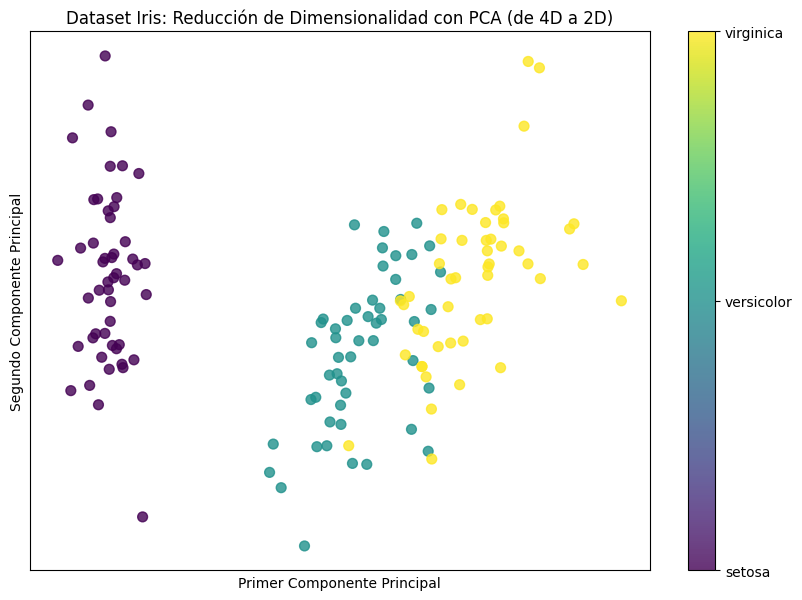

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Cargar el dataset Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Dimensiones originales del dataset Iris: {X_iris.shape[1]} características.")
print("Primeras 5 muestras del dataset Iris original (sin escalar):")
print(X_iris[:5])

# 2. Escalar los datos antes de PCA
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)
print("\nDatos escalados (primeras 5 muestras):")
print(X_iris_scaled[:5])

# 3. Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris_scaled)

print(f"\nDatos transformados con PCA. Nuevas dimensiones: {X_iris_pca.shape[1]} componentes.")
print("Primeras 5 muestras de los datos transformados con PCA:")
print(X_iris_pca[:5])

# 4. Explicar la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print(f"\nVarianza explicada por cada componente principal:")
print(f"Componente 1: {explained_variance_ratio[0]*100:.2f}%")
print(f"Componente 2: {explained_variance_ratio[1]*100:.2f}%")
print(f"Varianza acumulada: {sum(explained_variance_ratio)*100:.2f}%")

# 5. Visualizar los datos transformados en 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_iris, cmap='viridis', s=50, alpha=0.8)
plt.xlabel("Primer Componente Principal")
plt.ylabel("Segundo Componente Principal")
plt.title("Dataset Iris: Reducción de Dimensionalidad con PCA (de 4D a 2D)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks([]) # Ocultar ticks para una visualización más limpia de los clusters
plt.yticks([])
cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
cbar.set_ticklabels(target_names)
plt.show()

### Interpretación del Gráfico PCA

Este gráfico muestra las 150 muestras de flores Iris proyectadas en un espacio bidimensional (2D). Cada color representa una especie diferente de Iris. Como podemos observar:

* Las tres especies (setosa, versicolor, virginica) forman grupos distintos en el espacio 2D.
* La especie *Iris setosa* (morado/azul) está claramente separada de las otras dos.
* Las especies *Iris versicolor* (verde) y *Iris virginica* (amarillo) están más cerca entre sí, pero aún se pueden distinguir.

Esto demuestra que PCA ha logrado reducir la dimensionalidad de 4 a 2, manteniendo la información crucial que permite la separación de las clases. PCA es una herramienta muy potente para descubrir estas estructuras latentes en los datos, lo que es invaluable para la visualización, la compresión de datos y como un paso de preprocesamiento para otros algoritmos de aprendizaje.

### Otros Métodos de Reducción de Dimensiones

Aunque PCA es muy popular, especialmente por su interpretabilidad y eficiencia para datos lineales, existen otros métodos que son más adecuados para diferentes tipos de datos o propósitos:

#### 1. t-Distributed Stochastic Neighbor Embedding (t-SNE)

* **Propósito:** Principalmente utilizado para **visualización de datos** de alta dimensión en 2D o 3D.
* **Funcionamiento:** A diferencia de PCA que se enfoca en preservar la varianza global, t-SNE se enfoca en **preservar las distancias locales** entre los puntos. Intenta agrupar los puntos que están cerca en el espacio de alta dimensión y separarlos de los puntos que están lejos. Es muy bueno para revelar estructuras complejas y clústeres en datos no lineales.
* **Limitaciones:** Es computacionalmente intensivo para datasets muy grandes, y no se recomienda para reducir la dimensionalidad con fines de entrenamiento (ya que la transformación no es "fija" para nuevos datos), sino solo para visualización. Los resultados pueden variar entre diferentes ejecuciones debido a su naturaleza estocástica.

#### 2. Non-negative Matrix Factorization (NMF)

* **Propósito:** Una técnica de reducción de dimensiones y modelado de temas, especialmente útil para datos donde las características son inherentemente no negativas (valores >= 0), como frecuencias de palabras en documentos o intensidades de píxeles en imágenes.
* **Funcionamiento:** NMF descompone una matriz de datos original en dos matrices de menor dimensión con solo valores no negativos. Esto permite expresar las "partes" del conjunto de datos. Por ejemplo, en texto, puede expresar documentos como combinaciones de "temas", donde cada tema es una combinación de palabras (Unsupervised4.pdf, página 3).
* **Ventajas:** A menudo produce "partes" o "componentes" que son más **interpretables** que los componentes de PCA, porque los valores son no negativos. Por ejemplo, para un tema de texto, se pueden ver las palabras que contribuyen positivamente a ese tema.
* **Limitaciones:** Solo funciona con datos no negativos.

Estos métodos, junto con PCA, ofrecen un conjunto de herramientas versátiles para manejar la complejidad de los datos de alta dimensión, permitiéndonos explorarlos, comprenderlos y prepararlos mejor para análisis posteriores.